# Feature Preprocessing

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

## Load The Raw Features

### `Train`

In [128]:
text_train = pd.read_csv('../features/raw_train_text_features.csv', index_col=0)
speech_train = pd.read_csv('../features/raw_train_speech_features.csv', index_col=0)

### `Test`

In [129]:
text_test = pd.read_csv('../features/raw_test_text_features.csv', index_col=0)
speech_test = pd.read_csv('../features/raw_test_speech_features.csv', index_col=0)

## Filter "NaN"

In [132]:
# Count the columns/datags with NaN and deal accordingly

## Distribute Classes

As shown below, the classes are very unbalanced. We downsample the larger classes and upsample the smaller classes.

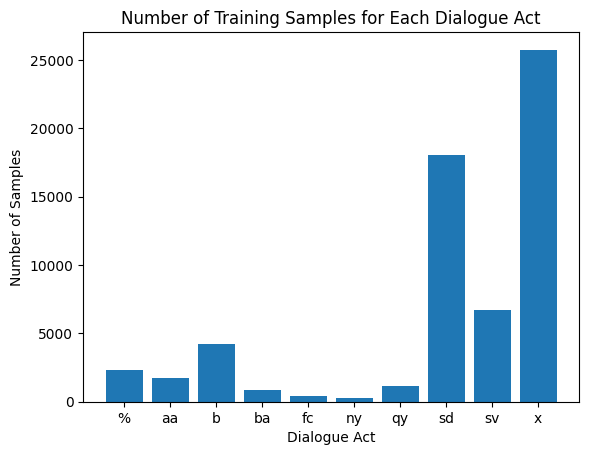

In [130]:
da_tags = []
num_samples = []

for row, item in text_train.groupby('da_tag'):
    da_tags.append(row)
    num_samples.append(len(item))

plt.bar(da_tags, num_samples)

plt.xlabel('Dialogue Act')
plt.ylabel('Number of Samples')
plt.title('Number of Training Samples for Each Dialogue Act')

plt.show()

In [115]:
def resample_df(df, n):
    sampled_dfs = []

    for row, item in df.groupby('da_tag'):
        sampled_dfs.append(item.sample(n=n, replace=True, random_state=1))

    return pd.concat(sampled_dfs)    

In [136]:
text_train = resample_df(text_train, 15000)
speech_train = resample_df(speech_train, 15000)

## Normalize

`min-max` feature scaling

Reference: https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [123]:
def min_max_scale(df):
    for column in df.columns:
        if (not column in ['dialog_id', 'speaker', 'da_tag', 'start_time', 'end_time']):
            df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())

In [138]:
min_max_scale(text_train)
min_max_scale(text_test)

In [134]:
min_max_scale(speech_train)
min_max_scale(speech_test)

In [139]:
text_test

,dialog_id,speaker,da_tag,start_time,end_time,function,pronoun,ppron,i,we,...,home,money,relig,death,informal,swear,netspeak,assent,nonflu,filler
0,sw2015,A,x,0.00000,2.36986,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,sw2015,B,x,0.00000,24.29833,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,sw2015,A,qy,2.36986,7.66596,0.619048,0.190476,0.047619,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
9,sw2015,A,x,24.31761,29.06336,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
10,sw2015,B,ny,24.75588,25.37475,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15399,sw4877,B,aa,285.08000,286.84000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,1.000000,0.0,0.0,1.0,0.000000,0.0
15402,sw4877,B,sd,286.84000,299.04000,0.500000,0.071429,0.071429,0.071429,0.000000,...,0.000000,0.0,0.0,0.0,0.071429,0.0,0.0,0.0,0.071429,0.0
15403,sw4877,A,x,287.42550,289.12000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0
15405,sw4877,A,x,289.44587,290.24000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0


## Write to CSV File

In [140]:
text_train.to_csv('../features/train_text_features.csv')
text_tesr.to_csv('../features/test_text_features.csv')

NameError: name 'text_tesr' is not defined